Total points for this HW: 10

Please note: Copying and pasting other people's work is absolutely prohibited. Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import svm
import scipy.stats as stats
import math
rcParams['figure.figsize'] = 6, 4

## Question 1 (25%)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

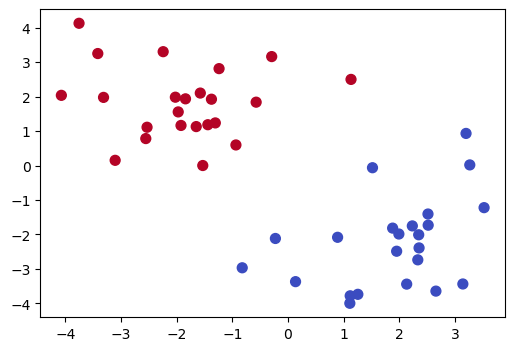

In [2]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap='coolwarm')
plt.show()

### a. Report the separating hyperplane (line) (5%).

In [3]:
# your code here

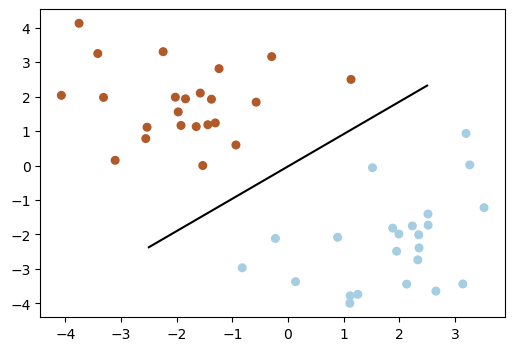

In [4]:
# Fit the model.  Using a linear SVM;
# Since the data is linearly separable, it won't misclassify any points.
clf=svm.SVC(kernel='linear',C=10**10)
clf.fit(X,Y)

# get the separating hyperplane w[0] x1 + w[1] x2 + intercept = 0
# transform to slope-intercept form: x2 = (-w[0]/w[1])x1 - (intercept/w[1])
w=clf.coef_[0]
a=-w[0]/w[1]
x1 = np.linspace(-2.5, 2.5)
x2=a*x1 - (clf.intercept_[0])/w[1]

# plot the separating hyperplane
plt.gca()
plt.plot(x1, x2, 'k-')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.Paired, s=30)

plt.axis('tight')
plt.show()

### b. List the support vectors (5%).

In [5]:
# get the support vectors
b1=clf.support_vectors_[0]
b2 = clf.support_vectors_[-1]
b1,b2

(array([ 1.5180363 , -0.06399383]), array([-1.531331e+00,  1.200000e-05]))

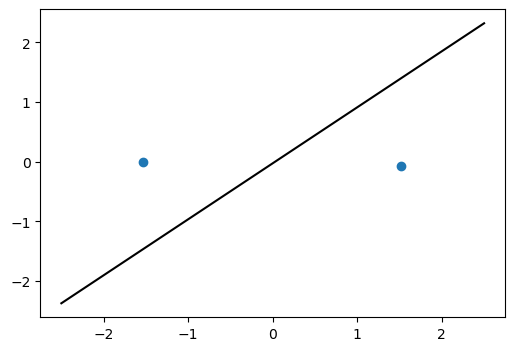

In [6]:
#plot the support vectors
plt.gca()
plt.plot(x1, x2, 'k-')
plt.scatter([b1[0], b2[0]], [b1[1], b2[1]])
plt.axis('tight')
plt.show()

### c. Calculate and report the upper and lower hyperplanes (lines) of the margin (5%).

In [7]:
# plot the parallels to the separating hyperplane (slope = a) that go through the support vectors.
b=clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])

b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

#report upper and lower hyperplanes lines
x2_down,x2_up

(array([-3.83555433, -3.73977293, -3.64399154, -3.54821015, -3.45242876,
        -3.35664736, -3.26086597, -3.16508458, -3.06930318, -2.97352179,
        -2.8777404 , -2.78195901, -2.68617761, -2.59039622, -2.49461483,
        -2.39883344, -2.30305204, -2.20727065, -2.11148926, -2.01570787,
        -1.91992647, -1.82414508, -1.72836369, -1.63258229, -1.5368009 ,
        -1.44101951, -1.34523812, -1.24945672, -1.15367533, -1.05789394,
        -0.96211255, -0.86633115, -0.77054976, -0.67476837, -0.57898698,
        -0.48320558, -0.38742419, -0.2916428 , -0.1958614 , -0.10008001,
        -0.00429862,  0.09148277,  0.18726417,  0.28304556,  0.37882695,
         0.47460834,  0.57038974,  0.66617113,  0.76195252,  0.85773392]),
 array([-0.90923657, -0.81345517, -0.71767378, -0.62189239, -0.52611099,
        -0.4303296 , -0.33454821, -0.23876682, -0.14298542, -0.04720403,
         0.04857736,  0.14435875,  0.24014015,  0.33592154,  0.43170293,
         0.52748432,  0.62326572,  0.71904711,  0

### d. Compute and report the width of the margin (5%). 

#### Optional: you can also add a plot showing all points, the separating hyperplane that passes through the support vectors for 5% extra credit.

In [8]:
# optional plot here
#compute the width of the margin through maximize "2M / ||w||"

In [9]:
distance1 = np.abs(np.dot(w, b1) + clf.intercept_[0]) / np.linalg.norm(w)
distance2 = np.abs(np.dot(w, b2) + clf.intercept_[0]) / np.linalg.norm(w)
M = min(distance1, distance2)
margin = 2* M / np.linalg.norm(w)
print('The width of margin: ', margin)

The width of margin:  2.2760430595405734


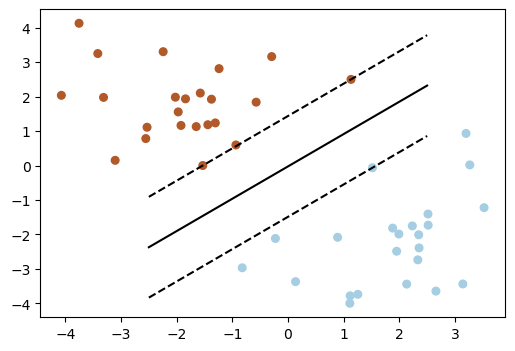

In [10]:
# plot the line, the points, and the nearest vectors to the plane
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.Paired, s=30)

plt.axis('tight')
plt.show()

### e. What would you expect to happen to the margin if the constant C was made very small? (5%)

Answer: when constant C becomes very small, the margin will become very largr.

Reason: Constance C is the regularization parameter. When C is small, the model allows some misclassification. Therefore, the margin could be large.

## Question 2 (25%)

### Given the dataset provided below, answer the following questions:

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3912\2980485167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm',2));


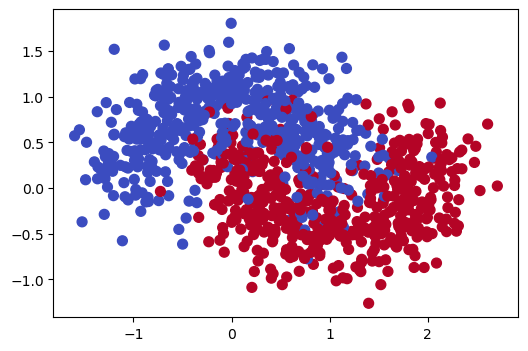

In [11]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm',2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)


### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy (4%).

In [12]:
# train a polynomial SVM
clf = svm.SVC(kernel='poly',degree=2) 
clf.fit(X_train,Y_train)

SVC(degree=2, kernel='poly')

In [13]:
# report both in-sample and out-of-sample classification accuracy 
print("In sample, we successfully predict {} percent of the data".format((Y_train==clf.predict(X_train)).sum()*100/len(Y_train)))

In sample, we successfully predict 71.94029850746269 percent of the data


In [14]:
print("Out of sample, we successfully predict {} percent of the data".format(100.0*(clf.predict(X_test)==Y_test).sum()/len(Y_test)))

Out of sample, we successfully predict 73.63636363636364 percent of the data


### Next we will use the validation subset (part of the training set) in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree. (8%)


In [15]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

# your code here

In [16]:
result = pd.DataFrame(columns=['degree', 'log_C', 'accuracy'])


for d in range(1, 5):
    for i in np.linspace(-10, 2 * d, 200):
        c = math.exp(i)
        clf = svm.SVC(kernel='poly', degree=d, C=c)
        clf.fit(X_vali,Y_vali)
        accrancy_vali=100.0*(clf.predict(X_vali)==Y_vali).sum()/len(Y_vali)
        result = pd.concat([result, pd.DataFrame({'degree': [d], 'log_C': [np.log(c)], 'accuracy': [accrancy_vali]})], ignore_index=True)
result.head()

,degree,log_C,accuracy
0,1,-10.000000,54.504505
1,1,-9.939698,54.504505
2,1,-9.879397,54.504505
3,1,-9.819095,54.504505
4,1,-9.758794,54.504505


In [17]:
D1=result[result['degree']==1]
D2=result[result['degree']==2]
D3=result[result['degree']==3]
D4=result[result['degree']==4]

Text(0, 0.5, 'accuracy')

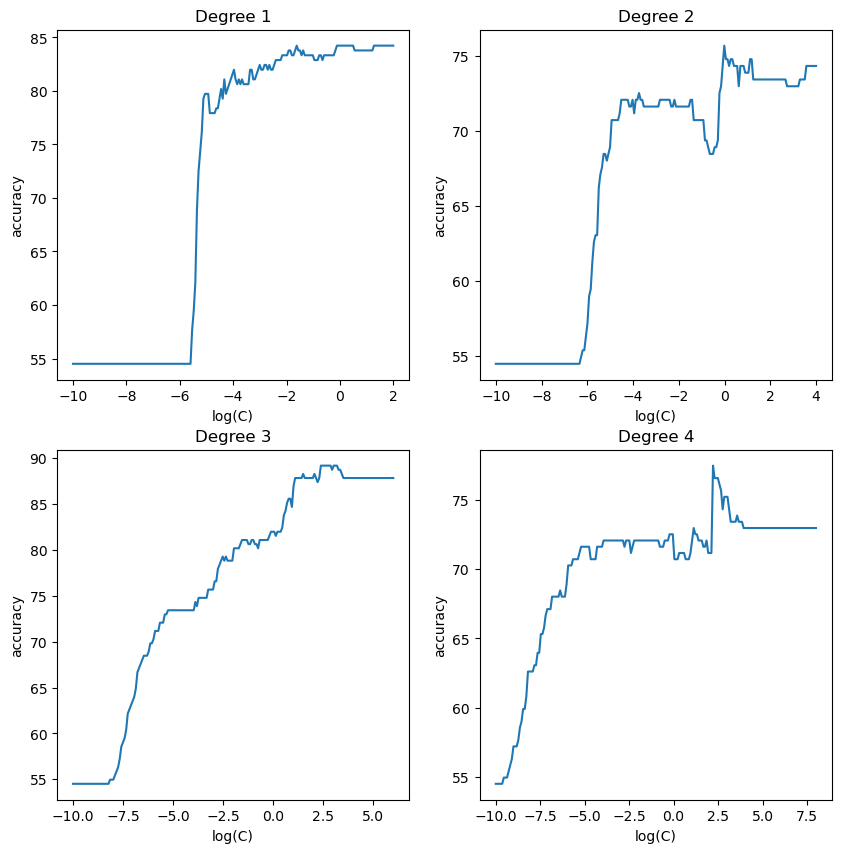

In [18]:
# plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].plot(D1['log_C'],D1['accuracy'])
axs[0, 0].set_title('Degree 1')
axs[0, 0].set_xlabel('log(C)')
axs[0, 0].set_ylabel('accuracy')

axs[0, 1].plot(D2['log_C'],D2['accuracy'])
axs[0, 1].set_title('Degree 2')
axs[0, 1].set_xlabel('log(C)')
axs[0, 1].set_ylabel('accuracy')

axs[1, 0].plot(D3['log_C'],D3['accuracy'])
axs[1, 0].set_title('Degree 3')
axs[1, 0].set_xlabel('log(C)')
axs[1, 0].set_ylabel('accuracy')

axs[1, 1].plot(D4['log_C'],D4['accuracy'])
axs[1, 1].set_title('Degree 4')
axs[1, 1].set_xlabel('log(C)')
axs[1, 1].set_ylabel('accuracy')

### c. Explain how each of these selected parameters can impact the performance of the model. Provide insights into the consequences of choosing different values for these parameters, particularly in terms of overfitting, accuracy, generalization, and other (5%).

 From the above plots, we can observe the following:

- When log(C) or the degree are too big, the complexity of the model will increase, which may lead to overfitting and reduce the accuracy;

- when log(C) or the degree are too small, the complexity of the model will reduce, which may lead to underfitting & generalization problem and reduce the accuracy.


### d. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected (8%). 

- When the degree is 3, the overall accuracy is optimal. 
- When log(C) is 2.5, the accuracy reaches a very high level.

In [19]:
c=np.exp(2.5)
clf = svm.SVC(kernel='poly', degree=3, C=c)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print("Out of sample, we successfully predict {} percent of the data".format((correct)*100))

Out of sample, we successfully predict 87.57575757575758 percent of the data


## Question 3 (10%)

### This task is to be done with manual calculations rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes

### Questions (just add responses below, and show how you got this result):

#### a. Calculate and report the following sample probabilities (5%):

P(Yes)= 6/11

P(No)= 1- 6/11 = 5/11

P(Red|Yes)= 5/6

P(SUV|Yes)= 2/6 = 1/3

P(Domestic|Yes)= 3/6 = 1/2

P(Red|No)= 2/5

P(SUV|No)= 3/5

P(Domestic|No)= 3/5

#### b. Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work (5%).

                          type              color                  origin
                      p(SUV)=1/3           p(red)=5/6            p(domestic)=1/2
    Stolen=Yes        P(sport)=2/3         p(yellow)=1/6         p(import)=1/2

    Stolen=NO         p(SUV)=3/5           p(red)=2/5            p(domestic)=3/5
                      P(sport)=2/5         p(yellow)=3/5         p(import)=2/5
                
  ————————————————————————————————————————————————————           
                       
                      type=SUV        color=red     origin=domestic       Likelihood
    Stolen=Yes          1/3             5/6              1/2                 5/36
    Stolen=NO           3/5             2/5              3/5                18/125

———————————————————————————————————————————————————

                   Likelihood      prior      unnormalizaed       posterior
                                                posterior     
    Stolen=Yes      5/36           6/11         5/66               0.537  
    Stolen=NO       18/125         5/11         18/275             0.463
    
Therefore, the probability that a red, domestic SUV will be stolen is 53.7%



## Question 4 (15%)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [20]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print(X_train.head())

   t_pre  glu  blood_p  triceps  serum   b_m  pedigree_f  age
0      3  158       64       13    387  31.2       0.295   24
1      0   84       64       22     66  35.8       0.545   21
2      9  120       72       22     56  20.8       0.733   48
3      4  110       76       20    100  28.4       0.118   27
4      2  100       66       20     90  32.9       0.867   28


### a. What is the prediction accuracy for Naive Bayes, both in-sample (on the training data) and out-of-sample (on the test data)? (3%)

In [21]:
# Training a binary Gaussian Naive Bayes Classifier with real-valued input attributes.
# Assume that the binary output variable takes on values 0 or 1. 
def trainGaussianNaiveBayes(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_mu1'] = X_1[j].mean()
        nbc[j+'_sigma1'] = X_1[j].std()
        nbc[j+'_mu0'] = X_0[j].mean()
        nbc[j+'_sigma0'] = X_0[j].std()
    return nbc

def testGaussianNaiveBayes(X,nbc):
    y_pred = pd.Series(index=X.index,dtype='float64')
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            pdf1 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu1'],scale=nbc[j+'_sigma1'])
            pdf0 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu0'],scale=nbc[j+'_sigma0'])
            y_pred[i] = y_pred[i]*pdf1/pdf0 if pdf0 > 0 else 1E10
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [22]:
naive_bayes_classifier = trainGaussianNaiveBayes(X_train,y_train)
for i,j in naive_bayes_classifier.items():
    print(i)
    print(j)
    print()
y_pred_train = testGaussianNaiveBayes(X_train,naive_bayes_classifier)
y_pred_test = testGaussianNaiveBayes(X_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

prior
0.326271186440678

t_pre_mu1
4.0

t_pre_sigma1
3.5725562129568855

t_pre_mu0
2.6729559748427674

t_pre_sigma0
2.537059135103386

glu_mu1
142.06493506493507

glu_sigma1
31.263875935055946

glu_mu0
111.23899371069183

glu_sigma0
24.52884097317486

blood_p_mu1
74.3896103896104

blood_p_sigma1
13.46355298785327

blood_p_mu0
69.0880503144654

blood_p_sigma0
11.805589562103403

triceps_mu1
33.16883116883117

triceps_sigma1
10.448372572096169

triceps_mu0
27.11320754716981

triceps_sigma0
10.155114152189197

serum_mu1
200.2207792207792

serum_sigma1
126.56438172107293

serum_mu0
128.25786163522014

serum_sigma0
92.42329791740885

b_m_mu1
34.89090909090909

b_m_sigma1
6.328677042640732

b_m_mu0
31.737735849056605

b_m_sigma0
6.355717840775721

pedigree_f_mu1
0.6141948051948053

pedigree_f_sigma1
0.4332104763446565

pedigree_f_mu0
0.47428930817610065

pedigree_f_sigma0
0.2935448631080321

age_mu1
35.44155844155844

age_sigma1
10.532522947735073

age_mu0
28.28301886792453

age_sigma0
8.325

### b. What is the prior probability of diabetes, learned from the training data? (3%)

In [23]:
# prior probability: the number of data whose lable = 1 divide by the number of all data

In [24]:
y_train_num=pd.DataFrame(y_train)
y_train_num.head(2)

,y
0,0
1,0


In [25]:
numbe_lable1=len(y_train[y_train_num['y']==1])

In [26]:
prior_probability = numbe_lable1 / len(y_train)
print("Prior probability of diabete:", prior_probability)

Prior probability of diabete: 0.326271186440678


### c. What is the mean and variance of each input variable for patients with diabetes? (3%)

In [27]:
data_train_diabetes=data_train[data_train['y']==1]
data_test_diabetes=data_test[data_test['y']==1]
input_variable = pd.concat([data_train_diabetes.iloc[:,2:], data_test_diabetes.iloc[:,2:]], axis=0)
input_variable.head(2)

,t_pre,glu,blood_p,triceps,serum,b_m,pedigree_f,age
4,2,100,66,20,90,32.9,0.867,28
6,8,186,90,35,225,34.5,0.423,37


In [28]:
each_x = input_variable.columns

In [29]:
results=[]
for i in each_x:
    mean_value = np.mean(input_variable[i])
    variance_value = np.var(input_variable[i])

    result = {
        'Feature': i,
        'Mean': mean_value,
        'Variance': variance_value
    }
    results.append(result)

mean_variance_diabetes = pd.DataFrame(results)
mean_variance_diabetes

,Feature,Mean,Variance
0,t_pre,4.204225,15.261109
1,glu,140.161972,1012.065314
2,blood_p,73.352113,163.509819
3,triceps,32.267606,105.984725
4,serum,194.063380,17599.284715
5,b_m,35.105634,45.314616
6,pedigree_f,0.588761,0.154716
7,age,35.063380,131.143870


### d. What is the mean and variance of each input variable for patients without diabetes? (3%)

In [30]:
data_train_diabetes_no=data_train[data_train['y']==0]
data_test_diabetes_no=data_test[data_test['y']==0]
input_variable_no = pd.concat([data_train_diabetes_no.iloc[:,2:], data_test_diabetes_no.iloc[:,2:]], axis=0)
input_variable_no.head(2)

,t_pre,glu,blood_p,triceps,serum,b_m,pedigree_f,age
0,3,158,64,13,387,31.2,0.295,24
1,0,84,64,22,66,35.8,0.545,21


In [31]:
results_no=[]
for i in each_x:
    mean_value = np.mean(input_variable_no[i])
    variance_value = np.var(input_variable_no[i])

    result_no = {
        'Feature': i,
        'Mean': mean_value,
        'Variance': variance_value
    }
    results_no.append(result_no)

mean_variance_diabetes_no = pd.DataFrame(results_no)
mean_variance_diabetes_no

,Feature,Mean,Variance
0,t_pre,2.769841,6.724805
1,glu,112.242063,686.072358
2,blood_p,69.134921,143.957987
3,triceps,27.325397,103.552847
4,serum,133.845238,10777.329223
5,b_m,31.795635,51.590973
6,pedigree_f,0.489921,0.100478
7,age,28.420635,72.418304


### e. What are some potential steps you may want to use to improve the prediction accuracy? (3%)

(1) I want to standardized the input variables first, because some of the factors have large varances and there exists a huge gap between the mean of different variables. These may reduce the prediction accuracy.

(2) I might introduce some new varibles based on the relevant articles. It is because the accuracy is low. I suspect there might be some other significant factors.

## Question 5 (25%)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [32]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print(X_Labeled_train)
print(y_Labeled_train)

   0  1  2
0  4  6  6
1  2  6  2
2  2  6  2
3  6  2  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  6
8  5  1  1
0    0
1    1
2    0
3    1
4    1
5    0
6    0
7    0
8    1
Name: y, dtype: int64


### a. Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy (10%).

In [33]:
# Training a binary Naive Bayes Classifier with discrete input attributes.
# Assume that the binary output variable takes on values 0 or 1. 
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index,dtype='float64')
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [34]:
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)
for i,j in naive_bayes_classifier.items():
    print(i)
    print(j)
    print()
y_pred_train = testNaiveBayesDiscrete(X_Labeled_train,naive_bayes_classifier)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

prior
0.4444444444444444

0_1
0
2    0.25
6    0.25
1    0.25
5    0.25
Name: proportion, dtype: float64

0_0
0
4    0.2
2    0.2
3    0.2
6    0.2
1    0.2
Name: proportion, dtype: float64

1_1
1
2    0.50
6    0.25
1    0.25
Name: proportion, dtype: float64

1_0
1
6    0.4
4    0.2
1    0.2
3    0.2
Name: proportion, dtype: float64

2_1
2
2    0.50
6    0.25
1    0.25
Name: proportion, dtype: float64

2_0
2
6    0.6
2    0.2
4    0.2
Name: proportion, dtype: float64



In [35]:
# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_Labeled_train)/len(y_Labeled_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

In sample prediction accuracy: 0.8888888888888888
Out of sample prediction accuracy: 0.6388888888888888


### b. Improve the classification by using the unlabeled data, data_Unlabeled and the EM algorithm to predict labels of X_Labeled_test, and report the new accuracy by EM semi-supervised algorithm (Please feel free to use code from our lab sessions or any packages you prefer) (15%). 

In [36]:
def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print('Iteration',t,'of',num_iters)
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled],ignore_index=True) 
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled],ignore_index=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [37]:
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=50)
for i,j in naive_bayes_classifier.items():
    print(i)
    print(j)
    print()
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

Iteration 1 of 50
Iteration 2 of 50
Iteration 3 of 50
Iteration 4 of 50
Iteration 5 of 50
Iteration 6 of 50
Iteration 7 of 50
Iteration 8 of 50
Iteration 9 of 50
Iteration 10 of 50
Iteration 11 of 50
Iteration 12 of 50
Iteration 13 of 50
Iteration 14 of 50
Iteration 15 of 50
Iteration 16 of 50
Iteration 17 of 50
Iteration 18 of 50
Iteration 19 of 50
Iteration 20 of 50
Iteration 21 of 50
Iteration 22 of 50
Iteration 23 of 50
Iteration 24 of 50
Iteration 25 of 50
Iteration 26 of 50
Iteration 27 of 50
Iteration 28 of 50
Iteration 29 of 50
Iteration 30 of 50
Iteration 31 of 50
Iteration 32 of 50
Iteration 33 of 50
Iteration 34 of 50
Iteration 35 of 50
Iteration 36 of 50
Iteration 37 of 50
Iteration 38 of 50
Iteration 39 of 50
Iteration 40 of 50
Iteration 41 of 50
Iteration 42 of 50
Iteration 43 of 50
Iteration 44 of 50
Iteration 45 of 50
Iteration 46 of 50
Iteration 47 of 50
Iteration 48 of 50
Iteration 49 of 50
Iteration 50 of 50
prior
0.49236229874903936

0_1
{4: 0.09539399465949207, 2: 